In [1]:
import slab_topology as tp
import matplotlib.pyplot as plt
import numpy as np

# Definições

O propósito desse notebook é testar a convergência dos valores presentes em um mapa criado pela função **generate_map()**, com todos os parâmetros fixos, exceto **nmax**, o qual será o parâmetro utilizado para testar a convergência.

Primeiramente, vamos definir os métodos pelos quais testaremos a convegência de um valor, e para isso, testaremos em duas funções as quais sabemos que convergem. A **série de Euler** e a **série alternada de leibniz**

In [2]:
def euler_sum(n):
    sum = 1
    factorial = 1
    for i in range(1, n+1):
        factorial *= i
        sum += 1/factorial
    return sum

def leibniz_series(n):
    sum = 1
    for i in range(n):
        term = (-1)**i / (2*i+1)
        sum += term
    return sum


Os métodos testados serão:

**A diferença dos termos da soma**, ou seja:

$$\lim_{n \rightarrow \infty} f(n + 1) - f(n) \approx 0$$

Visto que, caso a série seja convergente, $f(n) \approx f(n+1)$ para $n$ grande o suficiente.

**A razão entre os termos da soma**, ou seja:

$$ \lim_{n \rightarrow \infty}\frac{f(n+1)}{f(n)} \approx 1$$

Visto que, caso a série seja convergente, $f(n) \approx f(n+1)$ para $n$ grande o suficiente.

Suas respectivas funções em python, serão:

In [3]:
def diferenca_da_soma(valor1,valor2):
    return valor2-valor1

def razao_da_soma(valor1,valor2):
    return valor1/valor2

# Teste para a séries convergentes

## Série de Euler

In [4]:
#Vamos primeiro, gerar uma lista de valores:

euler = [euler_sum(i) for i in range(20)]

diferenca_euler = [diferenca_da_soma(euler[i+1],euler[i]) for i in range(len(euler) -1)]
razao_euler = [razao_da_soma(euler[i+1],euler[i]) for i in range(len(euler) -1)]

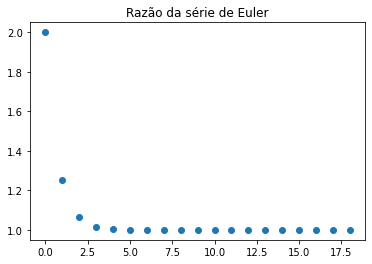

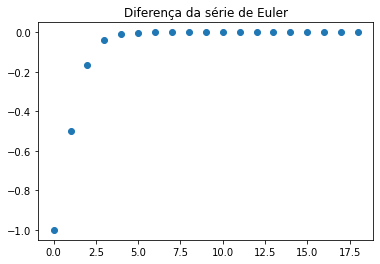

In [5]:
#Plotando o gráfico, para ver a tendência das funçôes:

x_axis = [i for i in range(len(euler)-1)]

plt.scatter(x_axis, razao_euler)
plt.title("Razão da série de Euler")
plt.show()

plt.scatter(x_axis, diferenca_euler)
plt.title("Diferença da série de Euler")
plt.show()

Vemos que conforme o proposto, para a série de Euler parece convergir.Contudo, ela é uma série que converge rapidamente, vamos testar agora a série de Leibniz, que converge lentamente:

In [6]:
leibniz = [leibniz_series(i) for i in range(20)]

diferenca_leibniz = [diferenca_da_soma(leibniz[i+1],leibniz[i]) for i in range(len(leibniz) -1)]
razao_leibniz = [razao_da_soma(leibniz[i+1],leibniz[i]) for i in range(len(leibniz) -1)]

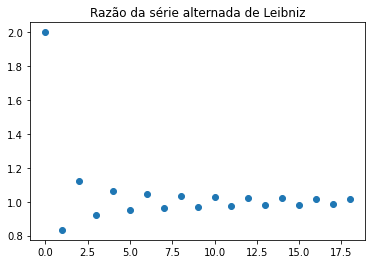

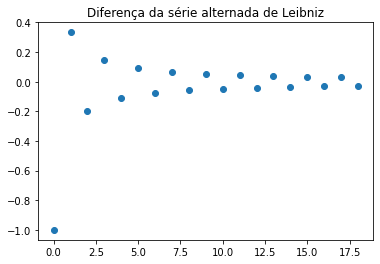

In [7]:
#Plotando o gráfico, para ver a tendência das funçôes:

x_axis = [i for i in range(len(euler)-1)]

plt.scatter(x_axis, razao_leibniz)
plt.title("Razão da série alternada de Leibniz")
plt.show()

plt.scatter(x_axis, diferenca_leibniz)
plt.title("Diferença da série alternada de Leibniz")
plt.show()

Vemos que conforme o proposto,a série de alternada de Leibniz parece convergir, mesmo que lentamente. Agora, vamos aplicar os métodos testados ao mapa gerado pela função **generate_map()**

## Aplicando os testes nos mapas de topologia. L = 0.2

In [8]:
maps = [tp.generate_map(4,10+i,1,1,1) for i in range(10)]

Como estamos tratando de arrays com vários valores, usaremos a média das diferenças, e a média das razões. Se cada valor da lista, pode ser, individualmente considerado uma numa soma de $n$ elementos de uma sequência, se essa sequência convergir para algum valor, os testes apresentados na seção anterior serão válidos. Dito isso, dado que cada valor do array é definido pelo mesmo algoritmo, com uma *seed* fixa, o valor da média dos testes também deve convergir.

In [9]:
def media_das_diferencas(mapa1, mapa2):
    diferenca = mapa2-mapa1
    media = diferenca/len(mapa1)
    
    return media

def media_das_razoes(mapa1, mapa2):
    razao = mapa1/mapa2
    media = razao/len(mapa1)
    
    return media

Analogamente, a sessão anterior, façamos as análises:

In [10]:
x_axis = [i for i in range(len(maps)-1)]

media_diferenca = [media_das_diferencas(maps[i+1],maps[i]) for i in range(len(maps)-1)]
media_razao = [media_das_razoes(maps[i+1],maps[i]) for i in range(len(maps)-1)]

9